 Decision Tree Training completed!


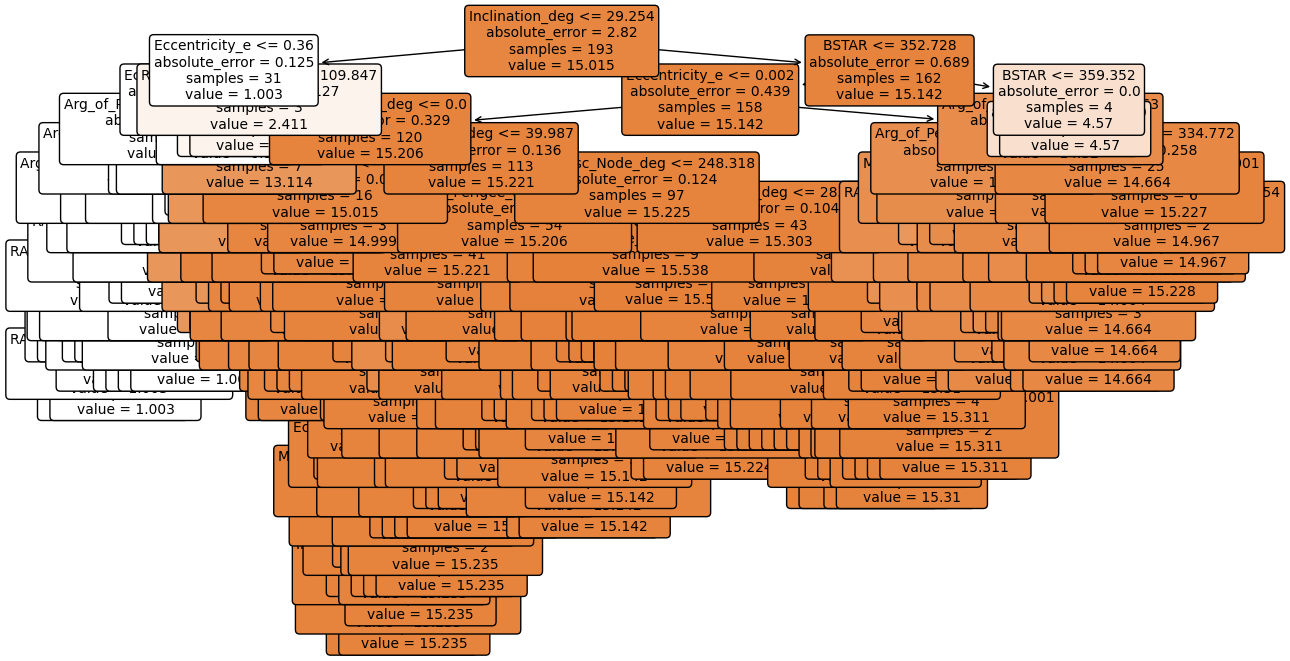

Feature importanceInclination_deg 0.8182100892513724
Feature importanceMean_Anomaly_deg 0.0797719775523429
Feature importanceEccentricity_e 0.03840553908130701
Feature importanceBSTAR 0.033247887379933456
Feature importanceArg_of_Perigee_deg 0.015244983537575925
Feature importanceRA_of_Asc_Node_deg 0.01511952319746846
Best parameter value  {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 1.0, 'min_samples_split': 0.25}


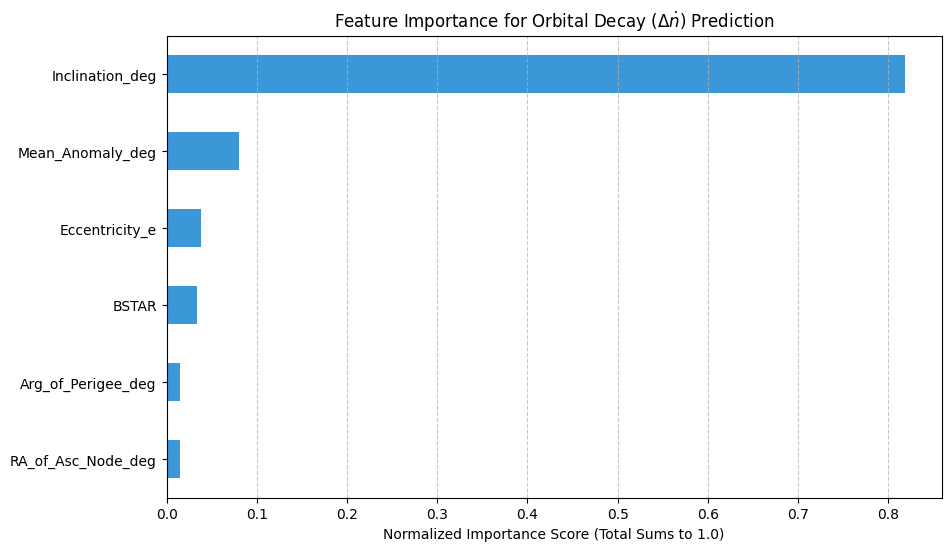

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



fd = pd.read_csv('Test_sat_data.csv')
df = fd.iloc[:,1:]

#Extract input from data set 
#Inclination_deg,RA_of_Asc_Node_deg,Eccentricity_e,Arg_of_Perigee_deg,Mean_Anomaly_deg,BSTAR
X = df.iloc[:,1:7]

#Output data Mean_Motion_rev_day
Y = df.iloc[:,7]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=42)
rt = DecisionTreeRegressor(criterion = 'absolute_error', max_depth=None)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2 = r2_score(y_test, y_pred)



print(f" Decision Tree Training completed!")


plt.figure(figsize=(14, 8))

plot_tree(
    rt,
    filled=True,
    feature_names=['Inclination_deg', 'RA_of_Asc_Node_deg', 'Eccentricity_e', 'Arg_of_Perigee_deg','BSTAR','Mean_Anomaly_deg'],
    class_names=True,
    rounded=True,
    fontsize=10
)

plt.show()

#plot_tree(rt)


for feature_importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
    print ("Feature importance" + name, feature_importance)
    
# Calculate feature importances
feature_importance = pd.Series(rt.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)   

#Hyperparameter Tuning
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
     

reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)    
reg.fit(X_train,y_train)

print('Best parameter value ' ,reg.best_params_)
     

# Generate the plot
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='#3C97D9')
plt.title('Feature Importance for Orbital Decay ($\Delta \dot{n}$) Prediction')
plt.xlabel('Normalized Importance Score (Total Sums to 1.0)')
plt.gca().invert_yaxis() # Put the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()





